In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


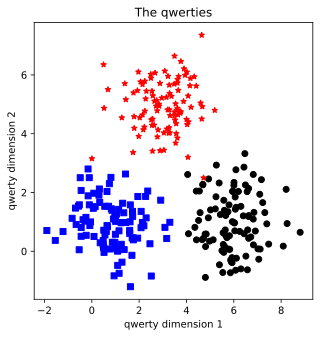

In [17]:
n_per_clust = 100
blur = 1

A = [1, 1]
B = [6, 1]
C = [3, 5]

a = torch.Tensor([A[0]+np.random.randn(n_per_clust)*blur , A[1]+np.random.randn(n_per_clust)*blur])
b = torch.Tensor([B[0]+np.random.randn(n_per_clust)*blur , B[1]+np.random.randn(n_per_clust)*blur])
c = torch.Tensor([C[0]+np.random.randn(n_per_clust)*blur , C[1]+np.random.randn(n_per_clust)*blur])

labels_first_second = np.vstack((np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1))))
labels_all = np.vstack((labels_first_second, np.full((n_per_clust, 1), 2)))

data_np = np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_all).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],[0]],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],[0]],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],[0]],data[np.where(labels==2)[0],1],'*r')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [28]:
ANNclassify = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,16),
    nn.ReLU(),
    nn.Linear(16,3)
)
    
lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)
    

In [29]:
labels = labels.view(-1,len(labels)).flatten().type(torch.LongTensor)
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
numepochs = 1000


losses = torch.zeros(numepochs)
ongoing_acc = []

for epochi in range(numepochs):
    yHat = ANNclassify(data)
    
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        

    
    matches = torch.argmax(yHat, axis=1) == labels
    matches_numeric = matches.float()
    accuracy_pct = 100*torch.mean(matches_numeric)
    ongoing_acc.append(accuracy_pct)
    
predictions = ANNclassify(data)
predictlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predictlabels==labels).float())

In [31]:
def get_class_accuracy(predictlabels, labels, num_of_class):
    len_of_labels = torch.sum((labels == num_of_class).float())
    predicted_class = torch.logical_and((labels == num_of_class),(predictlabels == num_of_class)).float()
    return 100*torch.sum(predicted_class)/len_of_labels

acc_versicolor = get_class_accuracy(predictlabels, labels, 1)
acc_setosa = get_class_accuracy(predictlabels, labels, 0)
acc_virginica= get_class_accuracy(predictlabels, labels, 2)

Final accuracy: 97.33333587646484%
Accuracy of blue class: 94.0%
Accuracy of black class: 99.0%
Accuracy of red class: 99.0%


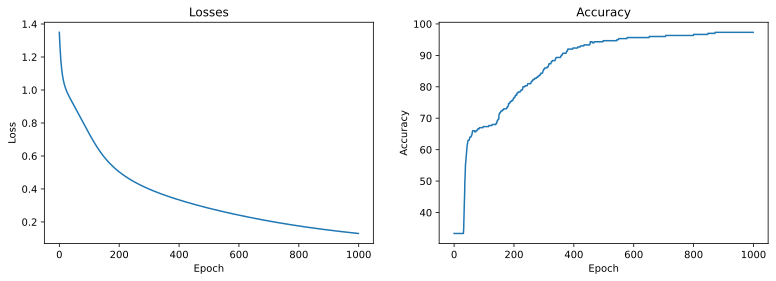

In [32]:
print(f"Final accuracy: {totalacc}%")
print(f"Accuracy of blue class: {acc_setosa}%")
print(f"Accuracy of black class: {acc_versicolor}%")
print(f"Accuracy of red class: {acc_virginica}%")

fig, ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoing_acc)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy')
plt.show()

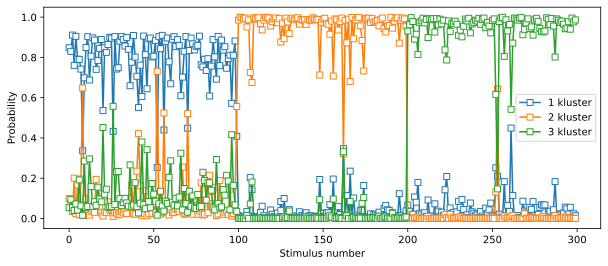

In [33]:
sm = nn.Softmax(dim=1)

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['1 kluster', '2 kluster', '3 kluster'])
plt.show()